# SHapley Additive exPlanations

In [1]:
# import libraries
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

from utils import load_process_split_dataset

import matplotlib.pyplot as plt
import numpy as np

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
# setting up variables
SEED = 2021
STROKE_PATH = "data/stroke.csv"

## Load Dataset & Training Random Forest

In [3]:
X_train, X_test, y_train, y_test = load_process_split_dataset(STROKE_PATH, SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4088, 21) (4088,)
(1022, 21) (1022,)


In [4]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5235431235431235
Accuracy 0.9500978473581213


## Explanation

In [5]:
explainer = shap.TreeExplainer(rf)
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [6]:
len(shap_values)

2

In [7]:
# shap values are a list of shape (num_classes, 1, num_features)
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[-6.31206831e-04, -3.97218793e-04, -4.04013486e-08,
         -6.39152062e-04, -7.66323159e-04, -1.27167424e-04,
         -3.03775996e-05,  2.20668361e-04,  2.33320595e-03,
         -2.03652426e-04,  7.93104781e-04,  1.64827064e-03,
         -9.49160239e-04,  2.10997689e-03,  1.63649398e-03,
          4.42495714e-04,  2.66289132e-02,  2.09338523e-03,
          2.16622333e-03,  9.29143509e-03,  3.38942132e-03]]),
 array([[ 6.31206831e-04,  3.97218793e-04,  4.04013486e-08,
          6.39152062e-04,  7.66323159e-04,  1.27167424e-04,
          3.03775996e-05, -2.20668361e-04, -2.33320595e-03,
          2.03652426e-04, -7.93104781e-04, -1.64827064e-03,
          9.49160239e-04, -2.10997689e-03, -1.63649398e-03,
         -4.42495714e-04, -2.66289132e-02, -2.09338523e-03,
         -2.16622333e-03, -9.29143509e-03, -3.38942132e-03]])]

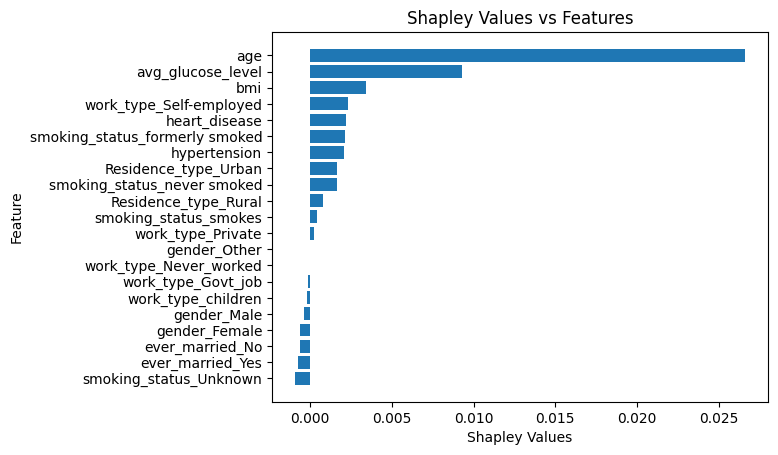

In [8]:
x = [X_test.columns[j] for j in np.argsort(shap_values[0])][0]
y = np.sort(shap_values[0].reshape(-1))
plt.barh(x, y)
 
plt.xlabel("Shapley Values")
plt.ylabel("Feature")

plt.title("Shapley Values vs Features")
plt.show()